目前使用LOP為定義之實驗數據採用20筆，多變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
datafile = u"/root/LR_ML/FinalData1.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0).drop(['No pulse', 'LOP error'],axis=1)

In [4]:
# TIP.head()

In [5]:
modTIP = TIP
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['LOP'], axis = 1))
# print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['SBP1','DBP1','BPM1'])
modTIP3['LOP'] = TIP['LOP']


             SBP1       DBP1       BPM1         LOP
count   20.000000  20.000000   20.00000   20.000000
mean   120.900000  73.400000   81.90000  123.555000
std     11.054411   8.616997   10.77961   11.101184
min    100.000000  61.000000   64.00000  106.800000
25%    114.000000  67.500000   73.50000  115.175000
50%    120.000000  72.000000   82.50000  124.500000
75%    129.750000  78.500000   90.50000  129.375000
max    139.000000  92.000000  104.00000  146.100000
SBP1    0
DBP1    0
BPM1    0
LOP     0
dtype: int64
          SBP1      DBP1      BPM1       LOP
SBP1  1.000000  0.509321  0.101498  0.831399
DBP1  0.509321  1.000000  0.522872  0.479533
BPM1  0.101498  0.522872  1.000000  0.202321
LOP   0.831399  0.479533  0.202321  1.000000


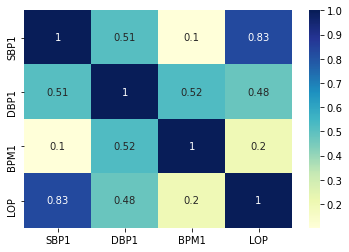

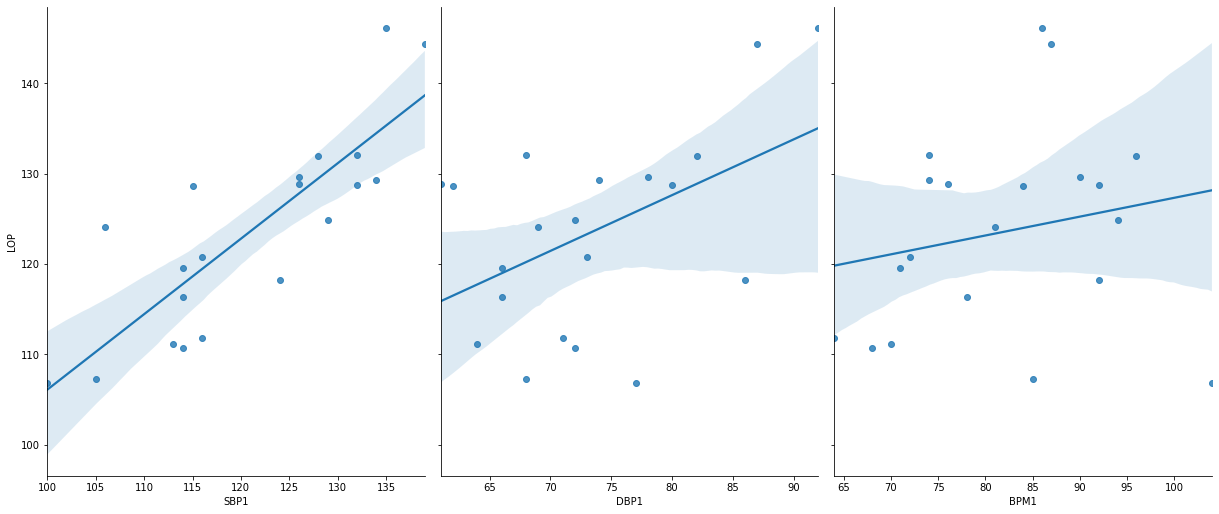

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
sns.pairplot(modTIP, x_vars=['SBP1','DBP1','BPM1'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot.png")
# plt.show()
# print(modTIP3.describe())
# print(modTIP3.corr())
# H = sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
# P = sns.pairplot(modTIP3, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# H
# F.savefig(u"/root/LR_ML/modData_Sorted4_correlation.png")
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot_normalization.png")
# plt.show()

In [7]:
XX=modTIP.drop(['LOP'],axis=1).iloc[:,0:]
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (20,3))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (20,1))

# lr=LinearRegression()
# predicted = cross_val_predict(lr, XX, YY, cv=5)
# fig, ax = plt.subplots()
# ax.scatter(YY, predicted)
# ax.plot([YY.min(), YY.max()], [YY.min(), YY.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []#MAE
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    print("MAE:",mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    a=lrr.intercept_
    print(a)
    b=lrr.coef_
    print(b)
print("5-fold Mean MAE:",np.mean(s))
# scoring = 'neg_mean_absolute_error'
# results = model_selection.cross_val_score(lr, XX, YY, cv=kfold, scoring=scoring)
# print("負的MAE",results.mean())

[12.5046346]
[[ 0.8098428  -0.01364572  0.17028584]]
[22.25566708]
[[ 0.79901958 -0.07065714  0.12195437]]
[13.12405722]
[[ 0.71846162  0.38839278 -0.05570854]]
[5.10548644]
[[0.93431516 0.01254452 0.05303368]]
[20.5643465]
[[ 0.85255919 -0.41913972  0.37586327]]
[2.8700386862541585, 4.5067389686354, 8.608849599723598, 6.774630366542045, 8.848880413802306]
6.321827606991501


自變量---源數據: (20, 3) ；  訓練集: (16, 3) ；  測試集: (4, 3)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
擬合參數:截距 104.3872056208613 ,迴歸係數： [32.58872502 -0.88047667  5.18667604]
最佳擬合線: LOP =  104.39 + 32.59 * SBP1 +  -0.88 * DBP1 +  5.19 * BPM1


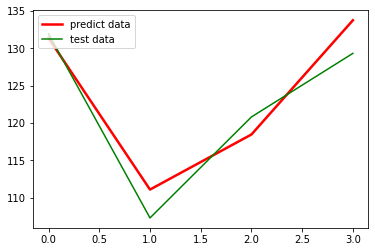

1.0
2.781047094155035
自變量---源數據: (20, 3) ；  訓練集: (16, 3) ；  測試集: (4, 3)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
擬合參數:截距 26.9448444821997 ,迴歸係數： [ 0.83465953 -0.27238665  0.1837719 ]
最佳擬合線: LOP =  26.94  +  0.83 * SBP1 +  -0.27 * DBP1 +  0.18 * BPM1


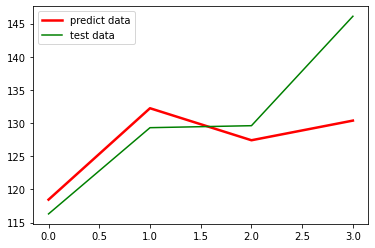

1.0
5.752625043315042


In [8]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
#正規化全參
X_train,X_test,Y_train,Y_test = train_test_split(modTIP3.drop(['LOP'],axis=1).iloc[:,0:],modTIP3.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP3.drop(['LOP'],axis=1).iloc[:,0:].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP3.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBP1 + ",round(b[1],2),"* DBP1 + ",round(b[2],2),"* BPM1")
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線
print(model.score(X_test,Y_pred))#R square
# print(mean_squared_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test, Y_pred))

#未正規化
X_train4,X_test4,Y_train4,Y_test4 = train_test_split(modTIP.drop(['LOP'],axis=1).iloc[:,0:],modTIP.LOP,train_size=0.8)
print("自變量---源數據:",modTIP.drop(['LOP'],axis=1).iloc[:,0:].shape, "；  訓練集:",X_train4.shape, "；  測試集:",X_test4.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train4.shape, "；  測試集:",Y_test4.shape)
model4 = LinearRegression()
model4.fit(X_train4,Y_train4)
I  = model4.intercept_
J = model4.coef_
print("擬合參數:截距",I,",迴歸係數：",J)
print("最佳擬合線: LOP = ",round(I,2)," + ",round(J[0],2),"* SBP1 + ",round(J[1],2),"* DBP1 + ",round(J[2],2),"* BPM1")
Y_pred4 = model4.predict(X_test4)
plt.plot(range(len(Y_pred4)),Y_pred4,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test4)),Y_test4,'green',label="test data")
plt.legend(loc=2)
# plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
plt.show()
print(model4.score(X_test4,Y_pred4))#R square
# print(mean_squared_error(Y_test1, Y_pred1))
print(mean_absolute_error(Y_test4, Y_pred4))